# Krzywa Hilberta

Wypełniająca kwadrat krzywa Hilberta $H:[0,1]\rightarrow [0,1]^2$ jest przykładem ciągłego odwzorowania, które pozwala przekształcić dwuwymiarowy obiekt na jednowymiarową reprezentację.
    
Wykorzystamy system Lindenmayera oparty na symbolach $A,B,F$, $+,-$ do reprezentacji skończonej rodziny krzywych $H_{n}:[0,1]\rightarrow [0,1]^2$, które w granicy $\lim_{n}H_n$ przybliżają krzywą Hilberta (pytanie: w jakim sensie jest opisana ta granica?)

System Lindenmayera dla krzywej $H_n$:

* alfabet: $A,B$
* stałe: $F,+,-$
* aksjomat $A$
* reguły (re)produkcji: $A\rightarrow +BF-AFA-FB+$, $B\rightarrow -AF+BFB+FA-$

Reguła $F$ oznacza rysowanie jednostki, $+$ oznacza skręt w lewo o $90$ stopni, $-$ oznacza skręt w prawo o $90$ stopni. Symbole $A$ i $B$ są ignorowane podczas rysowania.

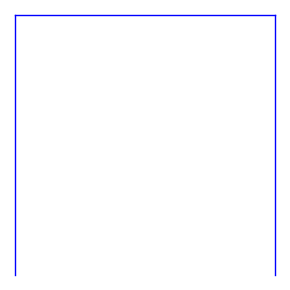

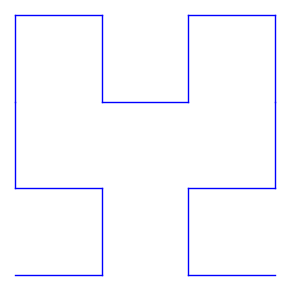

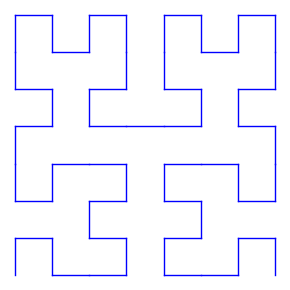

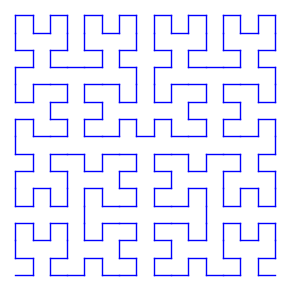

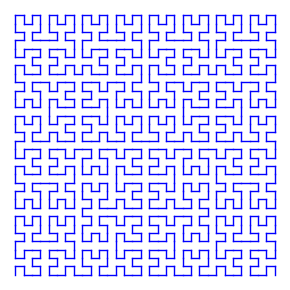

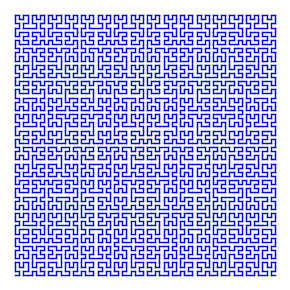

In [20]:
def F(state,gra): #narysuj linię w kierunku wynaczonym zmienną angle, z punktu (x,y) i o długości l
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    xend=x+l*cos(angle)
    yend=y+l*sin(angle)
    draw=line([(x,y),(xend,yend)],axes=False,aspect_ratio=1)
    gra=gra+draw
    return [[xend,yend],angle,l],gra

def a(state,gra,delta): #obróć się o kąt delta
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    return [[x,y],angle+delta,l],gra

def ApplyRule(str1,replrule): #zastosowanie reguł ze słownika replrule
    return''.join([replrule[x] for x in str1])


#Trójkąt Sierpinskiego

def DrawHilb(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="F":
            state,gra=F(state,gra)
        if s=="+":
            state,gra=a(state,gra,angle)
        if s=="-":
            state,gra=a(state,gra,-angle)
        str1=schop
    return state,gra

axiomHilb="A" 
replruleHilb={"A":"+BF-AFA-FB+","B":"-AF+BFB+FA-","+":"+","-":"-","F":"F"}

state0=[[0,0],0,1]
gra0=Graphics()
def f(s,n):
    while n>0:
        s,n=ApplyRule(s,replruleHilb),n-1
    return s

for i in range(1,7):
    _,qq=DrawHilb(f(axiomHilb,i),state0,gra0,pi/2)
    show(qq,axes=False,aspect_ratio=1,figsize=[3,3])

Prześledzmy teraz sposób kodowania punktów z odcinka $[0,1]$ w kwadracie $[0,1]^2$ za pomocą krzywej $H_n$. Odwołamy się do kodującego daną krzywą słowa z systemu Lindenmayera.

Startując z punktu $(0,0)$ w kierunku $[1,0]$ (kąt $0$ stopni względem osi $OX$) zanalizujemy trajektorię ruchu pisaka, który modeluje krzywą $H_1$.

In [2]:
f(axiomHilb,1)

'+BF-AFA-FB+'

Zgodnie z opisem słowa kodującego (ignorując symbole $A,B$) otrzymujemy następujący ciąg instrukcji:

$$+F-F-F+$$

1. (+) Obracamy wektor wodzący o $90$ stopni przeciwnie do ruchu wskazówek zegara, wskazuje on kierunek $k=[0,1]$.
2. (F) Poruszamy się o jednostkę w kierunku $k$.
3. (-) Obracamy wektor wodzący o $90$ stopni zgodnie z ruchem wskazówek zegara, wskazuje on kierunek $k=[1,0]$.
4. (F) Poruszamy się o jednostkę w kierunku $k$.
5. (-) Obracamy wektor wodzący o $90$ stopni zgodnie z ruchem wskazówek zegara, wskazuje on kierunek $k=[0,1]$.
6. (F) Poruszamy się o jednostkę w kierunku $k$.
4. (+) Obracamy wektor wodzący o $90$ stopni przeciwnie do ruchu wskazówek zegara, wskazuje on kierunek $k=[1,0]$.


Przesuwając punkt startowy do $(1/4,1/4)$ oraz skalując jednostkę kroku (dla $n=1$) do $1/2$ otrzymamy następującą krzywą $H_1$.

In [3]:
def H1(t):
    p0=vector([1/4,1/4])
    if t<=1/3:
        p=p0+(3*t)*vector([0,1/2])
        return tuple(p)
    if t<=2/3:
        p=p0+vector([0,1/2])+(3*(t-1/3))*vector([1/2,0])
        return tuple(p)
    if t>2/3:
        p=p0+vector([1/2,1/2])+(3*(t-2/3))*vector([0,-1/2])
        return tuple(p)
    print(t)
    print("Poza skalą")
    assert False

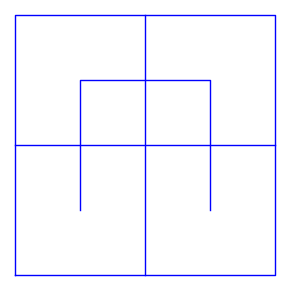

In [4]:
show(line([H1(0),H1(1/3),H1(2/3),H1(1)])+line([(0,0),(1,0),(1,1),(0,1),(0,0)])+line([(1/2,0),(1/2,1)])+line([(0,1/2),(1,1/2)]),aspect_ratio=1,figsize=[3,3],axes=False)

In [5]:
s=f(axiomHilb,2)

In [6]:
s1=s.replace('A','').replace('B','').replace('+-','').replace('-+','')
s1

'F+F+F-FF-F-F+F+F-F-FF-F+F+F'

In [7]:
#współrzędne odwiedzanych pikseli
def HVertices(n):
    s=f(axiomHilb,n)
    s1=s.replace('A','').replace('B','').replace('+-','').replace('-+','')
    N=s1.count('F')
    
    p=vector([0,0])
    k=vector([1,0])
    m=matrix(2,2,[0,-1,1,0])
    mi=matrix(2,2,[0,1,-1,0])
    piks=[tuple(p)]
    for el in s1:
        if el=='F':
            p=p+k
            piks.append(tuple(p))
        if el=='+':
            k=m*k
        if el=='-':
            k=mi*k
    return piks        

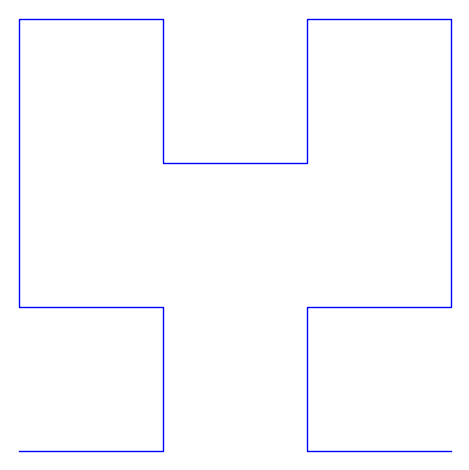

In [8]:
show(line(HVertices(2)),axes=False,aspect_ratio=1)

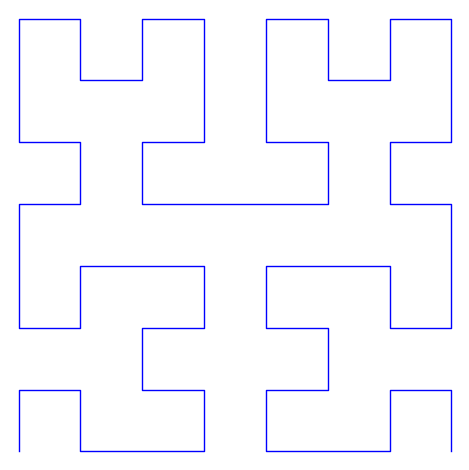

In [9]:
show(line(HVertices(3)),axes=False,aspect_ratio=1)

In [10]:
H4=HVertices(4)

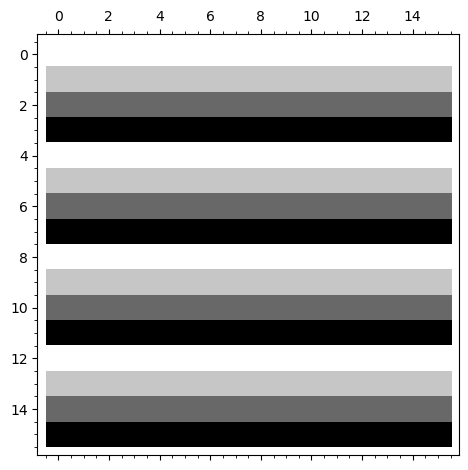

In [25]:
#ignorowanie komunikatów technicznych
import warnings
warnings.filterwarnings("ignore")
matrix_plot(matrix(16,16,[(i-4*j)%4/4 for i in range(0,16) for j in range(0,16)]))

In [12]:
m=matrix(16,16,[(i+4*j)%4/4 for i in range(0,16) for j in range(0,16)])

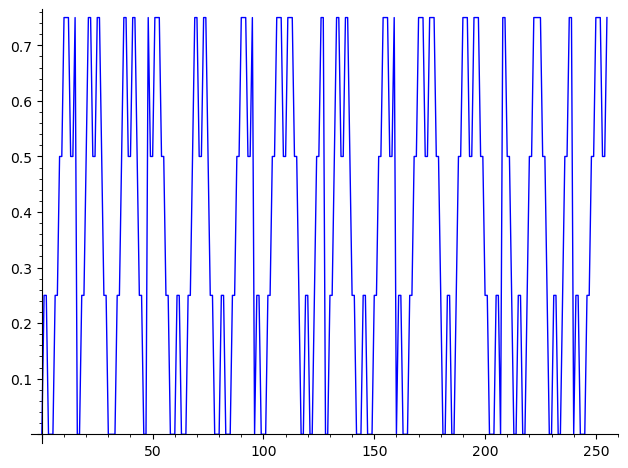

In [13]:
list_plot([m[x[0],x[1]] for x in H4],plotjoined=True)

## Kompresja metodą krzywej Hilberta

Kodujemy obraz za pomocą współrzędnych generowanych przez pewną iterację krzywej Hilberta. Następnie wartości pikseli są zamieniane na liczby rzeczywiste. W kolejnym kroku stosujemy dyskretną transformatę Fouriera do ciągu \((a_n)_n\) i otrzymujemy rozkład spektralny. Kompresja (stratna) polega na usunięciu z zapisu spektralnego pewnych częstości o najmniejszych amplitudach.

Odwrócona dyskretna transformata Fouriera odtwarza nam (niedoskonałą) kopię oryginalnego obrazu.

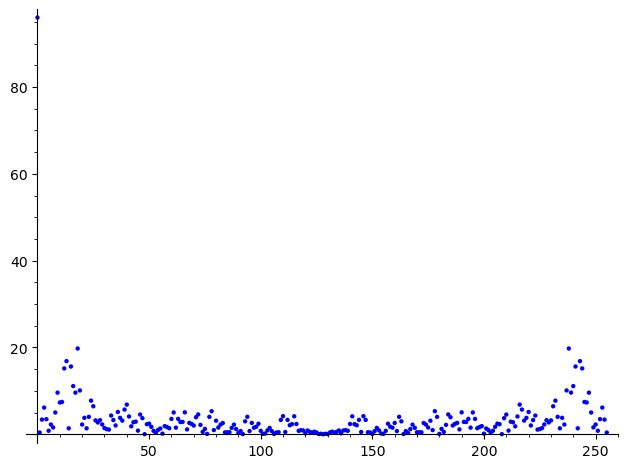

In [14]:
A=[RR(m[x[0],x[1]]) for x in H4]
J = list(range(len(A)))
s = IndexedSequence(A,J)
t=s.fft();

list_plot([abs(x) for x in t.list()])

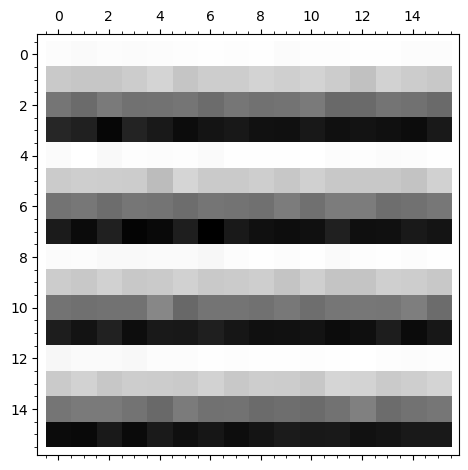

In [15]:
tt=t.list()
tts=[]
for el in tt:
    if abs(el)>1:
        tts.append(el)
    else:
        tts.append(0)

A2=tts
J2 = list(range(len(A2)))
s2 = IndexedSequence(A2,J2)
t2=s2.ifft();


mrec=matrix(RealField(),16,16,[0]*256)
for el in zip(H4,[abs(x) for x in t2.list()]):
    a,b=el[0]
    mrec[a,b]=el[1]
matrix_plot(mrec)

Stratna kompresja syntetycznego obrazu paskowego pokazuje dość duży udział szumów w rekonstrukcji obrazu. W podanym przykładzie uzyskaliśmy tylko stopień kompresji równy 30 procent. Jak zobaczymy poniżej na przykładzie obrazu kota, rekonstrukcja rzeczywistych obrazów pozwala uzyskać dużo wyższy poziom kompresji przy zachowaniu zadowalającej jakości.

In [16]:
list(map(lambda x: abs(x)<0.001,tts)).count(True)/len(tts)

0.30078125

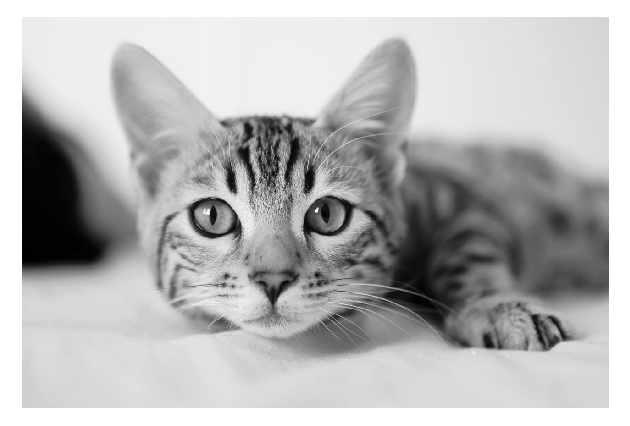

In [52]:
import numpy as np
import matplotlib.pyplot as py
arr=py.imread('figs/cat2.png')

#konwersja na odcienie szarości
def rgb2gray(rgb):
    return (np.dot(rgb[...,:3], [-1,-1,0]))/2

matrix_plot(rgb2gray(arr),frame=False)

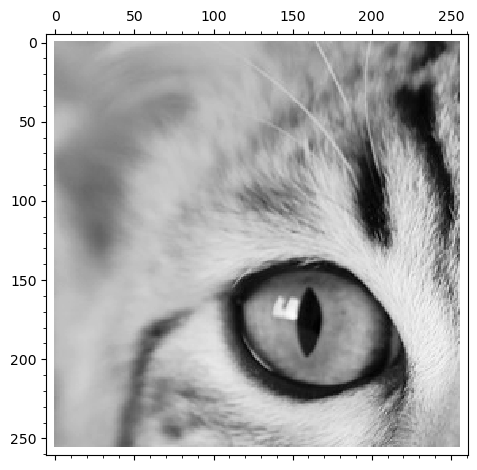

In [55]:
kk=rgb2gray(arr)

oko=(kk.transpose())[256:512].transpose()[256:512]
matrix_plot(oko)

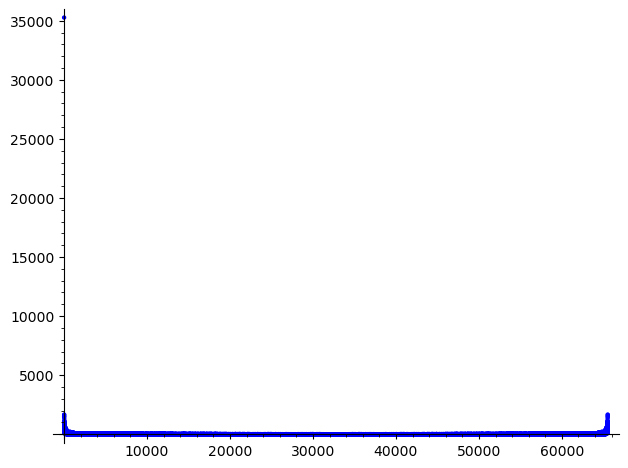

In [56]:
m=oko
H8=HVertices(8)
A=[RR(m[x[0],x[1]]) for x in H8]
J = list(range(len(A)))
s = IndexedSequence(A,J)
t=s.fft();

list_plot([abs(x) for x in t.list()])

In [58]:
AA=[abs(x) for x in t.list()]
[min(AA),max(AA)]

[0.0423108842316575, 35270.2990471341]

Wartości transformaty o największym module mają dominujący wpływ na obraz. Wyrzucenie wartości o najmniejszych normach skutkuje pogorszeniem jakości, ale odcinając na odpowiednio wysokim poziomie możemy uzyskać zadowolającą jakość.

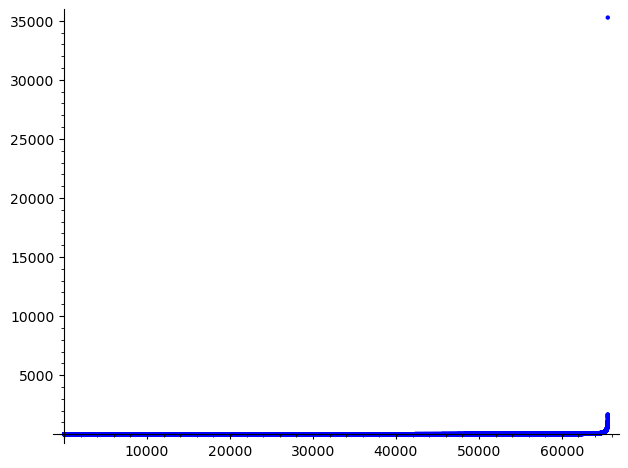

In [59]:
list_plot(sorted(AA))

In [113]:
# ostatni element o normie mniejszej niż 10
AAs=sorted(AA)
AAs[46274]

9.99937812254643

In [57]:
[min(A),max(A)]

[-0.986274510622025, -0.0333333341404796]

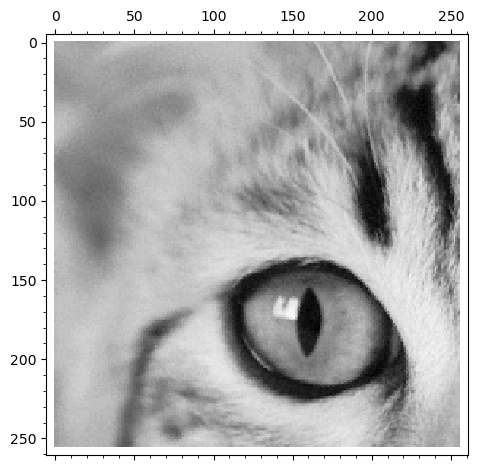

In [91]:
tt=t.list()
tts=[]
for el in tt:
    if abs(el)>10:
        tts.append(el)
    else:
        tts.append(0)

A2=tts
J2 = list(range(len(A2)))
s2 = IndexedSequence(A2,J2)
t2=s2.ifft();


mrec=matrix(RealField(),256,256,[0]*(256**2))
for el in zip(H8,[1-abs(x) for x in t2.list()]):
    a,b=el[0]
    mrec[a,b]=el[1]
matrix_plot(mrec)

In [92]:
#współczynnik kompresji uzyskanej w wyniku usunięcia z transformaty wszystkich wartości o normie większej od 30
list(map(lambda x: abs(x)<10,tts)).count(True)/len(tts)

0.7061004638671875